In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import host, user, password

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

### Question 1

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.



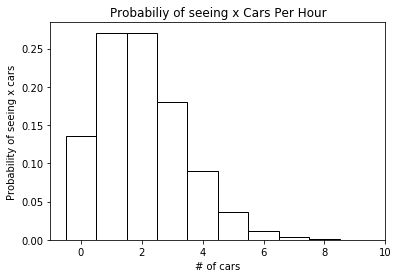

In [2]:
x = range(10)
mean = 2
y = stats.poisson(mean).pmf(x)

plt.title("Probabiliy of seeing x Cars Per Hour")
plt.xlabel("# of cars")
plt.ylabel("Probability of seeing x cars")
plt.bar(x, y, color="white", edgecolor="black", width=1)
plt.show()

In [3]:
# What is the probability that no cars drive up in the noon hour?
# what is the p(n == 0)
theory = stats.poisson(mean).pmf(0)
simulation = (stats.poisson(mean).rvs(10_000) == 0).mean()

In [4]:
theory

0.1353352832366127

In [5]:
simulation

0.1413

In [6]:
# What is the probability that 3 or more cars come through the drive through?
# using descrete numbers so 3 or more means anything over 2
theory = stats.poisson(2).sf(2)
simulation = (stats.poisson(2).rvs(10_000) >= 3).mean()

In [7]:
theory

0.32332358381693654

In [8]:
simulation

0.3178

In [9]:
# How likely is it that the drive through gets at least 1 car?
stats.poisson(2).cdf(1)

0.40600584970983794

### Question 2
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [23]:
mean = 3.0
std = 0.3
grades = stats.norm(mean, std)

In [25]:
# theory
grades.isf(.05)

3.4934560880854417

In [12]:
# simulation
np.percentile(grades.rvs(10_000), 95)

3.492949738419582

(array([1.000e+00, 3.000e+00, 1.200e+01, 1.700e+01, 3.100e+01, 6.500e+01,
        1.260e+02, 1.410e+02, 2.770e+02, 3.610e+02, 5.170e+02, 6.180e+02,
        7.520e+02, 8.910e+02, 9.360e+02, 1.012e+03, 9.190e+02, 8.480e+02,
        6.760e+02, 5.640e+02, 4.420e+02, 3.200e+02, 2.150e+02, 1.130e+02,
        6.900e+01, 4.000e+01, 1.600e+01, 1.000e+01, 5.000e+00, 3.000e+00]),
 array([1.88479731, 1.95788662, 2.03097594, 2.10406525, 2.17715457,
        2.25024388, 2.3233332 , 2.39642251, 2.46951183, 2.54260114,
        2.61569046, 2.68877977, 2.76186909, 2.8349584 , 2.90804772,
        2.98113703, 3.05422635, 3.12731566, 3.20040498, 3.27349429,
        3.34658361, 3.41967292, 3.49276224, 3.56585155, 3.63894086,
        3.71203018, 3.78511949, 3.85820881, 3.93129812, 4.00438744,
        4.07747675]),
 <a list of 30 Patch objects>)

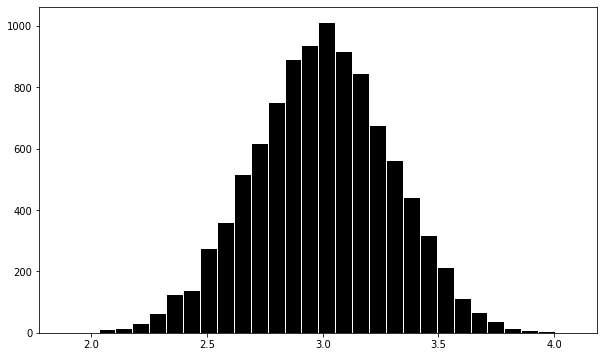

In [13]:
plt.figure(figsize=(10,6))
plt.hist(grades.rvs(10_000), bins = 30, fc='black', ec='white')

In [14]:
# What grade point average is required to be in the top 5% of the graduating class?
# theory
grades.ppf(.95)

3.4934560880854417

In [15]:
# simulation
np.percentile(grades.rvs(10_000), 5)

2.4985915688028357

In [16]:
# What GPA constitutes the bottom 15% of the class?
# theory
grades.ppf(.15)

2.689069983151863

In [17]:
# simulation
np.percentile(grades.rvs(10_000), 15)

2.6941451441295583

In [18]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Would a student with a 2.8 grade point average qualify for this scholarship?
gpa = 2.8
# we need to find the deciles between 20 percent and 30 percent so we can see if a person with a 2.8 gpa would qualify
# deciles are groups of 10% intervals
second_decile = grades.ppf(.2)
third_decile = grades.ppf(.3)
print('2nd decile is', second_decile)
print('3rd decile is', third_decile)

theoretical = gpa > second_decile and gpa < third_decile
theoretical

2nd decile is 2.7475136299281258
3rd decile is 2.842679846187588


True

In [19]:
# simulation
upper_bound = np.percentile(grades.rvs(10_000), 30)
lower_bound = np.percentile(grades.rvs(10_000), 20)
print('The upper boun is', upper_bound)
print('The lower bound is', lower_bound)

simulation = lower_bound < gpa and gpa < upper_bound
simulation

The upper boun is 2.838160674088571
The lower bound is 2.7469608326825075


True

In [20]:
# If I have a GPA of 3.5, what percentile am I in?
# theoretical
grades.cdf(3.5)

0.9522096477271853

In [21]:
# simulation
simulation = (grades.rvs(10_000) <= 3.5).mean()
simulation

0.9535

### Question 3
- A marketing website has an average click-through rate of 2%. 
- bOne day they observe 4326 visitors and 97 click-throughs. 
- How likely is it that this many people or more click through?

In [30]:
# How likely is is that this many or more click through"
# This many or more is survival function
clicks_distribution = stats.binom(4326, .02)

# visitors_today = 97
# .sf needs one less than today's count to include today

theory = clicks_distribution.sf(96)
simulation = (clicks_distribution.rvs(100_000) > 96).mean()
theory, simulation

(0.1397582363130086, 0.13986)

### Question 4
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?

In [31]:
# p = 99/100 # probability of wrong answers
# n = 60 # 60 minutes

# stats.binom(n, p).pmf(60)

# Binomial b/c we're correct or not
n = 60
probability = .01
theory = stats.binom(n, probability).sf(0) # suvival fuction does not include zero only anythin above it

simulation = (stats.binom(n, probability).rvs(10_000) > 0).mean()

theory, simulation

(0.4528433576092388, 0.4574)

In [33]:
# what is the probability of having just one correct

# p_correct = 1 - stats.binom(n, p).pmf(60)
# p_correct

### Question 5 
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.


In [34]:
# total number of visits per day
# total_of_clases = 3
# number_of_students_per_class = 22
# p_visit = 0.9

# visits = round(total_of_clases * number_of_students_per_class * p_visit, 0)
# visits

# How likely is it that the break area gets cleaned up each day?
n_students = round(.9 * 3 * 22)

# "Greater than" is our signal to use .sf or .isf
# Greater than 0 means someone cleaned up 
theory = stats.binom(n_students, .03).sf(0)

simulation = (stats.binom(n_students, .03).rvs(100_000) > 0).mean()
theory, simulation

(0.8342199288437355, 0.83455)

In [35]:
# # probability of at least one person cleaning p(n > 0)
# p_clean = 0.3
# stats.binom(visits, p_clean).sf(0) # suvival fuction does not include zero only anythin above it


# How likely is it that it goes two days without getting cleaned up?
# p_not_clean = 1 - p_cleaned
n_days = 2
(1 - theory) ** n_days, (1 - simulation) ** n_days

(0.027483031992576113, 0.027373702499999996)

In [36]:
# How likely is it that it goes 5 days without getting cleaned up?
# p_not_clean = 1 - p_clean
n_days = 5
(1 - theory) ** n_days, (1 - simulation) ** n_days

(0.0001252165138809122, 0.0001239749259270048)

In [38]:
# Another way to build this out
# All week w/ .sf
p_not_cleaned = 1 - theory
stats.binom(5, p_not_cleaned).sf(4) # to include 5 we need to be one less than five

0.0001252165138809122

### Question 6
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3.
- If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
- Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [43]:
# need 2 mins to order, 10 minutes to get order, and 15 minutes to eat
time_to_order_and_eat = 2 + 10 + 15
time_for_lunch = 60
max_time_to_wait = time_for_lunch - time_to_order_and_eat
print("Our max wait time is", max_time_to_wait, "minutes.")
# we cannot wait longer than 33 minutes

Our max wait time is 33 minutes.


In [45]:
# .cdf b/c we want a given wait time or less
# Average people is 15, so we're going from avg_people to average_wait_time
avg_wait = 15 * 2 # (15 people) x (2 minutes / 1 person)

# One standard deviation is 3 people worth of wait (edited) 
# 1 person == 2 minutes worth of wait
sd = 3 * 2 # convert the standard deviation from person to minutes

theory = stats.norm(avg_wait, sd).cdf(max_time_to_wait)

simulated = (stats.norm(avg_wait, sd).rvs(10_000) <= max_time_to_wait).mean()
theory, simulated

(0.6914624612740131, 0.6902)

### Question 7
Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:


In [48]:
db_name = "employees"
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"
df = pd.read_sql("""
    select emp_no, salary from salaries 
    join dept_emp using(emp_no)
    where salaries.to_date > curdate() 
    and dept_emp.to_date > curdate()
    """, url)
salaries = df.set_index("emp_no")

In [49]:
avg = salaries.mean()["salary"]
stdev = salaries.std()["salary"]
avg, stdev

(72012.23585730705, 17309.995380251985)

In [50]:
# What percentage of employees earn less than 60,000
theory = stats.norm(avg, stdev).cdf(60_000)
actual = (salaries < 60_000).mean()["salary"]
theory, actual

(0.24385742480214434, 0.2705727041028802)

In [51]:
# What percentage of employees earn more than 95,000?

theory = stats.norm(avg, stdev).sf(95_000)
actual = (salaries > 95_000).mean()["salary"]
theory, actual

(0.09208819199804058, 0.1086272092752078)

In [52]:
# What percent of employees earn between 65,000 and 80,000?
actual = ((salaries < 80_000) & (salaries > 65_000)).mean()["salary"]

# .sf for above
# % above 65 minus % above 80
above_65 = stats.norm(avg, stdev).sf(65_000)
above_80 = stats.norm(avg, stdev).sf(80_000)
theory = above_65 - above_80
theory

theory, actual

(0.3350605685446666, 0.325107028035515)

In [53]:
# What do the top 5% of employees make?
# We're looking for probability of x and greater
# And we have the percentage and want that cutoff, so .isf
theory = stats.norm(avg, stdev).isf(.05)
actual = salaries.quantile(.95)["salary"]

theory, actual

(100484.64454102777, 104225.84999999998)

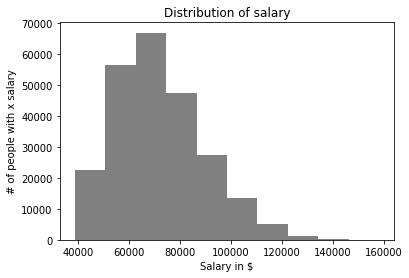

In [54]:
x = np.array(salaries.salary)

plt.title("Distribution of salary")
plt.ylabel("# of people with x salary")
plt.xlabel("Salary in $")
plt.hist(x, color="gray")
plt.show()